# Лабораторна робота 2
### МІТ-31
### Кульчицького Дмитра

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sea
import sklearn 
import random as rnd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 

### 1. Створити набір даних за допомогою DatasetGenerator

In [186]:
x, y = make_regression(n_samples=1028, n_features=19, n_informative=512, n_targets=1,  noise=1.0, shuffle=True, coef=False, random_state=None)

print(x,y)

[[-0.62018073 -0.65826248 -0.35836589 ... -0.21849771 -0.30699181
  -0.8455928 ]
 [-1.18878759  0.94962622 -1.12435869 ...  0.27932248 -0.76911408
  -0.72461361]
 [ 0.44922772 -0.17249109 -0.71215639 ... -0.99633558 -0.98350837
   0.02849189]
 ...
 [-0.70871235 -0.03167618  0.47456211 ... -0.4431931   0.49838716
   0.50978931]
 [-2.18219183 -0.25800065  0.03050395 ... -1.35830712  3.10066123
   1.43453116]
 [ 0.09654585 -0.55955042  1.99601412 ... -0.72736276 -0.33537338
  -0.09613651]] [ -95.26776705 -240.70052669  -22.76076084 ...  -82.47814183 -199.06433169
  -29.29012185]


In [187]:
data = pd.DataFrame(x, y)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
-95.267767,-0.620181,-0.658262,-0.358366,0.606934,-1.522240,0.501409,1.978595,-1.242291,-0.821207,1.057184,-0.745029,-0.300871,-0.111735,1.013244,-1.809825,0.084814,-0.218498,-0.306992,-0.845593
-240.700527,-1.188788,0.949626,-1.124359,-0.006323,-2.109555,-0.491647,-0.476303,-1.692209,-0.559633,0.008742,0.703988,0.248957,-0.654983,-0.086992,1.346116,-0.615704,0.279322,-0.769114,-0.724614
-22.760761,0.449228,-0.172491,-0.712156,-0.328581,-0.067138,-0.771342,1.344896,-0.227836,-0.768861,-0.294198,1.329311,0.158473,0.637964,-0.585445,0.708369,-0.167426,-0.996336,-0.983508,0.028492
-23.235881,-0.907815,0.849811,0.655488,0.965602,0.505497,-0.276519,-0.145809,-1.584796,-0.016617,0.305892,-0.624596,0.863743,0.154436,1.800415,-1.340950,-0.746719,-1.120849,0.825216,-0.574511
178.641381,0.618536,0.039048,0.299314,0.897320,-0.108936,1.631627,2.104777,-0.915021,-0.222061,-0.313735,-0.246242,1.467154,-0.356049,-1.055671,-0.896611,0.175973,-0.565349,-0.604210,0.589669


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1028 entries, -95.26776705170938 to -29.290121847878726
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1028 non-null   float64
 1   1       1028 non-null   float64
 2   2       1028 non-null   float64
 3   3       1028 non-null   float64
 4   4       1028 non-null   float64
 5   5       1028 non-null   float64
 6   6       1028 non-null   float64
 7   7       1028 non-null   float64
 8   8       1028 non-null   float64
 9   9       1028 non-null   float64
 10  10      1028 non-null   float64
 11  11      1028 non-null   float64
 12  12      1028 non-null   float64
 13  13      1028 non-null   float64
 14  14      1028 non-null   float64
 15  15      1028 non-null   float64
 16  16      1028 non-null   float64
 17  17      1028 non-null   float64
 18  18      1028 non-null   float64
dtypes: float64(19)
memory usage: 160.6 KB


In [189]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,-0.011456,-0.015668,0.037506,-0.003916,0.013381,0.021367,-0.006389,0.076780,-0.006754,-0.019025,0.019874,-0.033012,0.009670,-0.024591,0.000540,0.001157,0.012094,0.026855,0.039346
std,1.011391,0.981710,0.991873,1.002398,1.010661,1.020131,0.983470,1.018700,0.986625,0.994012,1.024676,0.994331,1.003785,0.954560,1.019756,0.993671,1.012770,1.033068,1.055110
min,-2.920883,-3.749600,-3.198396,-3.151523,-3.151264,-3.038083,-2.976084,-3.819595,-2.971684,-3.794432,-3.622169,-2.969698,-2.991998,-3.391541,-3.297271,-2.988764,-3.221583,-3.404996,-3.592434
25%,-0.709324,-0.701408,-0.661210,-0.625976,-0.661355,-0.674631,-0.658123,-0.646494,-0.698140,-0.684569,-0.685602,-0.644540,-0.667408,-0.647391,-0.683294,-0.654226,-0.688545,-0.679889,-0.689254
50%,-0.024100,0.015617,0.064233,0.036520,0.031661,-0.033644,-0.004295,0.102395,-0.002398,-0.014064,0.012782,-0.039008,-0.010946,-0.015734,-0.015958,0.029060,0.014685,0.033588,0.075836
75%,0.706903,0.647783,0.731309,0.626711,0.664672,0.704406,0.643265,0.775398,0.677853,0.635887,0.729933,0.623872,0.701412,0.615511,0.674753,0.646321,0.706888,0.698767,0.710398
max,2.990224,3.172155,2.966904,3.697222,2.957379,3.380812,2.956188,3.864255,2.952807,2.881951,3.123052,3.022054,3.120738,2.669989,3.440644,3.226984,4.028308,3.300793,4.884576


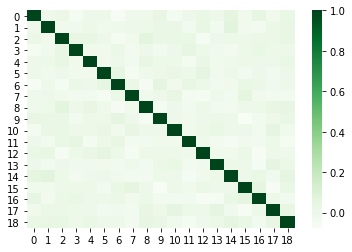

In [190]:
sea.heatmap(data.corr(), cmap="Greens")
data.to_csv('data_set.csv')

### 2. Завантажити набір даних для регресії на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)

In [191]:
data = pd.read_csv('audi.csv')
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [192]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


<AxesSubplot:>

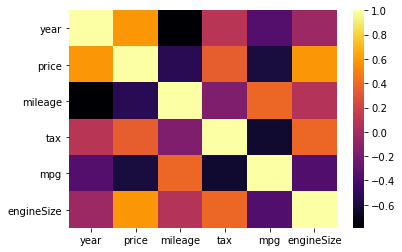

In [194]:
sea.heatmap(data.corr(), cmap="inferno")

In [195]:
columns=data.columns
columns=columns[:5]
x=data[['year', 'price', 'mileage', 'tax', 'mpg']]
y=data[['engineSize']]


In [196]:
x_split,x_test,y_split,y_test = train_test_split(x,y,test_size=0.3)

In [197]:
regression = LinearRegression()
regression.fit(x_split,y_split)

y_Hat = regression.predict(x_test)

print("================Absolute Error===================")
mean_absolute_error(y_test, y_Hat)

================Absolute Error===================


0.26191974859352307

In [198]:
print("================Squared Error===================")
mean_squared_error(y_test, y_Hat)

================Squared Error===================


0.13129717869767424

In [199]:
dataFrame = pd.DataFrame(y_test)
dataFrame['engineSize_predicted'] = y_Hat
dataFrame.head()

,engineSize,engineSize_predicted
1999,1.6,1.546149
504,2.0,1.873119
7747,2.0,2.109485
7914,2.0,1.587878
2636,2.0,1.929306


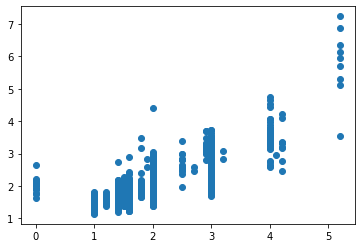

In [200]:
mat.scatter(dataFrame['engineSize'],dataFrame['engineSize_predicted'])

### 3. (опціонально для отримання відмінної оцінки) Згенерувати набір даних для регресії на основі звичайних можливостей Python

In [201]:
mark = {0:'<0', 1:'>12'}
engine__vol = {0:'<0', 1:'>255'}
work = {0:'Yes', 1:'No'}
years__on__service = {0:'0', 1:'1', 2: '2', 3: 'More than 3'}
damaged = {0:'No', 1:'Yes'}
counry = {0:'Belorusia', 1:'English', 2:'France', 3:'Germany', 4:'Czechoslovakia'}
info = []
for i in range(0, 256):
    row = []
    row.append(mark[rnd.randint(0, 1)])
    row.append(engine__vol[rnd.randint(0, 1)])
    row.append(work[rnd.randint(0, 1)])
    row.append(years__on__service[rnd.randint(0, 3)])
    row.append(damaged[rnd.randint(0, 1)])
    row.append(counry[rnd.randint(0, 4)])
    info.append(row)
data = pd.DataFrame(info, columns=['mark', 'engine__vol', 'work', 'years__on__service', 'damaged', 'counry'])
counry

{0: 'Belorusia', 1: 'English', 2: 'France', 3: 'Germany', 4: 'Czechoslovakia'}

In [202]:
data.head()

,mark,engine__vol,work,years__on__service,damaged,counry
0,>12,>255,No,0,No,France
1,<0,>255,No,1,Yes,France
2,>12,>255,Yes,More than 3,No,Germany
3,<0,>255,Yes,1,Yes,France
4,<0,>255,Yes,0,Yes,Czechoslovakia


In [203]:
data.replace({'<0': 0, '>12':1, '<0': 0, '>255':1, 'Yes':0, 'No':1, '0':0, '1':1, '2':2, 'More than 3':3, 'No':0, 'Yes':1, 'Belorusia': 0
, 'English':1, 'France':2, 'Germany':3, 'Czechoslovakia':4}, None, True)

data.to_csv('data2.csv')

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   mark                256 non-null    int64
 1   engine__vol         256 non-null    int64
 2   work                256 non-null    int64
 3   years__on__service  256 non-null    int64
 4   damaged             256 non-null    int64
 5   counry              256 non-null    int64
dtypes: int64(6)
memory usage: 12.1 KB


In [205]:
data.describe()

,mark,engine__vol,work,years__on__service,damaged,counry
count,256.000000,256.00000,256.000000,256.000000,256.000000,256.000000
mean,0.429688,0.53125,0.539062,1.519531,0.460938,1.750000
std,0.496001,0.50000,0.499448,1.058861,0.499448,1.346018
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,1.00000,1.000000,1.000000,0.000000,2.000000
75%,1.000000,1.00000,1.000000,2.000000,1.000000,3.000000
max,1.000000,1.00000,1.000000,3.000000,1.000000,4.000000


<AxesSubplot:>

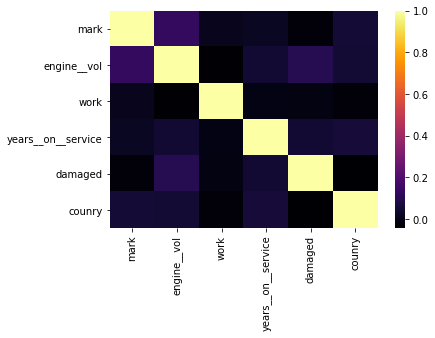

In [206]:
sea.heatmap(data.corr(), cmap="inferno")

In [207]:
columns=data.columns
columns=columns[:7]
x=data[['mark', 'engine__vol', 'work', 'years__on__service', 'damaged']]
y=data[['counry']]

In [208]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [209]:
regression = LinearRegression()
regression.fit(x_train,y_train)
y_Hat = regression.predict(x_test)


In [210]:
print("================Abcolute Error===================")
mean_absolute_error(y_test, y_Hat)

================Abcolute Error===================


1.216930450007367

In [211]:
print("================Absolute Error===================")
mean_squared_error(y_test, y_Hat)

================Absolute Error===================


1.8681180294286757

In [212]:
res = pd.DataFrame(y_test)
res['counry__prediction'] = y_Hat

res.head()

,counry,counry__prediction
238,2,1.594464
59,1,1.466295
90,2,1.722694
102,4,1.648265
50,0,1.644600


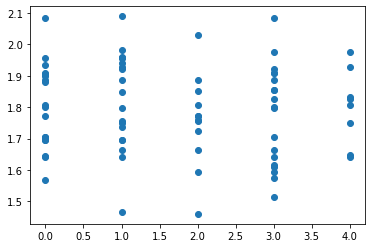

In [213]:
mat.scatter(res['counry'],res['counry__prediction'])